In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set()

In [3]:
df = pd.read_csv(r"C:\Users\alexchen\ML\nzairfare\NZairfares.csv")

In [4]:
df=df.rename(columns={'Travel Date':'Travel_date','Dep. airport':'Departure','Arr. airport':'Destination'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162833 entries, 0 to 162832
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Travel_date   162833 non-null  object
 1   Departure     162809 non-null  object
 2   Dep. time     162833 non-null  object
 3   Destination   162809 non-null  object
 4   Arr. time     162828 non-null  object
 5   Duration      162833 non-null  object
 6   Direct        162833 non-null  object
 7   Transit       123077 non-null  object
 8   Baggage       2311 non-null    object
 9   Airline       162828 non-null  object
 10  Airfare(NZ$)  162833 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 13.7+ MB


In [6]:
df.shape

(162833, 11)

In [7]:
##check missing values
df.isnull().sum()

Travel_date          0
Departure           24
Dep. time            0
Destination         24
Arr. time            5
Duration             0
Direct               0
Transit          39756
Baggage         160522
Airline              5
Airfare(NZ$)         0
dtype: int64

In [8]:
df.head()

,Travel_date,Departure,Dep. time,Destination,Arr. time,Duration,Direct,Transit,Baggage,Airline,Airfare(NZ$)
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,(Direct),NaN,NaN,Jetstar,111
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,(Direct),NaN,NaN,Jetstar,111
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,(Direct),NaN,NaN,Jetstar,132
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,(Direct),NaN,NaN,Jetstar,132
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,(Direct),NaN,NaN,Air New Zealand,133


In [9]:
df.describe()

,Airfare(NZ$)
count,162833.000000
mean,411.031769
std,168.958742
min,32.000000
25%,293.000000
50%,392.000000
75%,512.000000
max,1364.000000


In [10]:
df.columns

Index(['Travel_date', 'Departure', 'Dep. time', 'Destination', 'Arr. time',
       'Duration', 'Direct', 'Transit', 'Baggage', 'Airline', 'Airfare(NZ$)'],
      dtype='object')

In [11]:
#Check category var value distinct count
#print(df['Travel Date'].unique())
#print(df['Dep. airport'].unique())
#print(df['Arr. airport'].unique())
#print(df['Arr. time'].unique())
#print(df['Duration'].unique())
print(df['Direct'].unique())
#print(df['Transit'].unique())
#print(df['Baggage'].unique())
#print(df['Airline'].unique())


['(Direct)' '(1 stop)' '(2 stops)' '(3 stops)']


In [12]:
#Check category var value count
#print(df['Travel Date'].value_counts())
#print(df['Dep. airport'].value_counts())
#print(df['Arr. airport'].value_counts())
#print(df['Arr. time'].value_counts())
#print(df['Duration'].value_counts())
#print(df['Direct'].value_counts())
#print(df['Transit'].value_counts())
#print(df['Baggage'].value_counts())
#print(df['Airline'].value_counts())


In [13]:
# Remove column Baggage
df=df.drop(columns=['Baggage'])
# Drop missing value

df = df[df['Departure'].notna()]
df = df[df['Arr. time'].notna()]
# Drop transit missing value when Direct not equal to "direct" 
# If Direct equal to "direct" then nah in transit will be count as 0
df_1 = df[df['Direct'].isin(["(1 stop)","(2 stops)","(3 stops)"])&(df['Transit'].notnull())]
df_2 = df[df['Direct']=="(Direct)"].fillna(0)
df_3 = pd.concat([df_1,df_2])

In [14]:
##check missing values
df_3.isnull().sum()

#df.head()

Travel_date     0
Departure       0
Dep. time       0
Destination     0
Arr. time       0
Duration        0
Direct          0
Transit         0
Airline         0
Airfare(NZ$)    0
dtype: int64

In [15]:
df_3.shape

(142765, 10)

### Split Data

In [16]:
################### split to train_data and test_data ##############################
train_data, test_data = train_test_split(df_3, test_size=0.2, random_state=25)

### Train Data

In [17]:
train_data["Travel_day"] = pd.to_datetime(train_data.Travel_date, format="%d/%m/%Y").dt.day
train_data["Travel_month"] = pd.to_datetime(train_data["Travel_date"], format = "%d/%m/%Y").dt.month

In [18]:
train_data=train_data.drop(columns=['Transit'])


In [19]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep. time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep. time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep. time"], axis = 1, inplace = True)

In [20]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data["Arr. time"]).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data["Arr. time"]).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arr. time"], axis = 1, inplace = True)

In [21]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [22]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [23]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [24]:
train_data["Direct"].value_counts()

(1 stop)    98476
(Direct)    15736
Name: Direct, dtype: int64

In [25]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"(Direct)": 0, "(1 stop)": 1, "(2 stops)": 2, "(3 stops)": 3}, inplace = True)

In [26]:
train_data.head()

,Travel_date,Departure,Destination,Direct,Airline,Airfare(NZ$),Travel_day,Travel_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
22054,30/09/2019,AKL,NSN,1,Air New Zealand,203,30,9,8,30,19,20,10,50
692,19/09/2019,CHC,AKL,1,Air New Zealand,517,19,9,14,5,18,20,4,15
89528,3/11/2019,CHC,PMR,1,Air New Zealand,362,3,11,18,0,8,35,14,35
108221,13/11/2019,AKL,ZQN,1,Air New Zealand,391,13,11,16,0,20,35,4,35
95149,6/11/2019,WLG,NPL,1,Air New Zealand,213,6,11,6,45,14,45,8,0


In [27]:
train_data['Departure'].value_counts()

WLG    32813
CHC    32193
AKL    30460
ZQN    18746
Name: Departure, dtype: int64

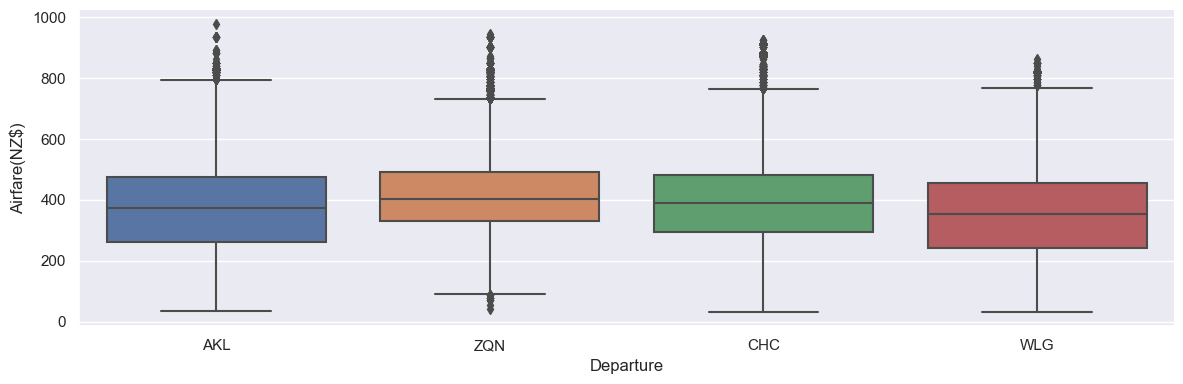

In [28]:
# Departure vs Price

sns.catplot(y = "Airfare(NZ$)", x = "Departure", data = train_data.sort_values("Airfare(NZ$)", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

In [29]:
# As Departure is Nominal Categorical data we will perform OneHotEncoding

Departure = train_data["Departure"].str.get_dummies().drop('ZQN',axis=1).add_prefix('Dept_')

#Departure = pd.get_dummies(Departure)

Departure.head()

,Dept_AKL,Dept_CHC,Dept_WLG
22054,1,0,0
692,0,1,0
89528,0,1,0
108221,1,0,0
95149,0,0,1


In [30]:
train_data['Destination'].value_counts()

NSN    16564
NPE    14735
DUD    13097
AKL    12961
CHC    12816
PMR    12431
NPL    11966
ZQN    10696
WLG     8946
Name: Destination, dtype: int64

In [31]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding - drop WLG

Destination = train_data["Destination"].str.get_dummies().drop('WLG',axis=1).add_prefix('Arr_')

#Destination = pd.get_dummies(Destination)

Destination.head()

,Arr_AKL,Arr_CHC,Arr_DUD,Arr_NPE,Arr_NPL,Arr_NSN,Arr_PMR,Arr_ZQN
22054,0,0,0,0,0,1,0,0
692,1,0,0,0,0,0,0,0
89528,0,0,0,0,0,0,1,0
108221,0,0,0,0,0,0,0,1
95149,0,0,0,0,1,0,0,0


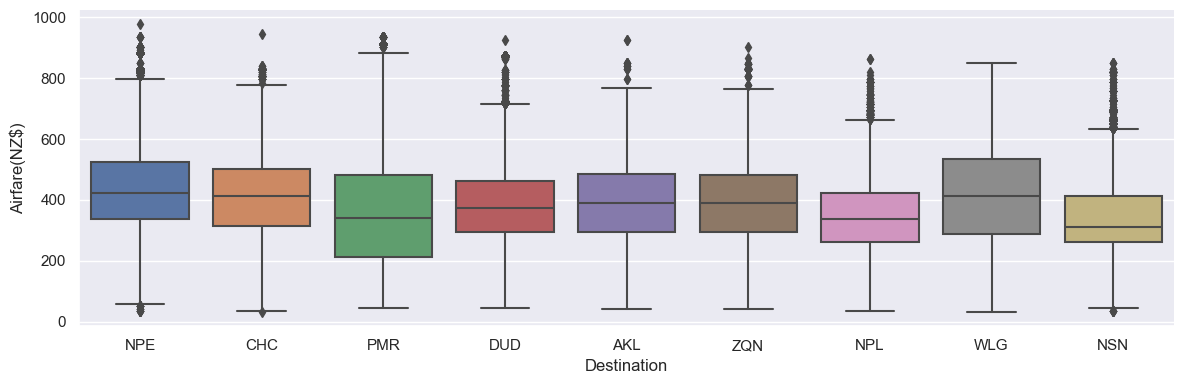

In [32]:
# Departure vs Price

sns.catplot(y = "Airfare(NZ$)", x = "Destination", data = train_data.sort_values("Airfare(NZ$)", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

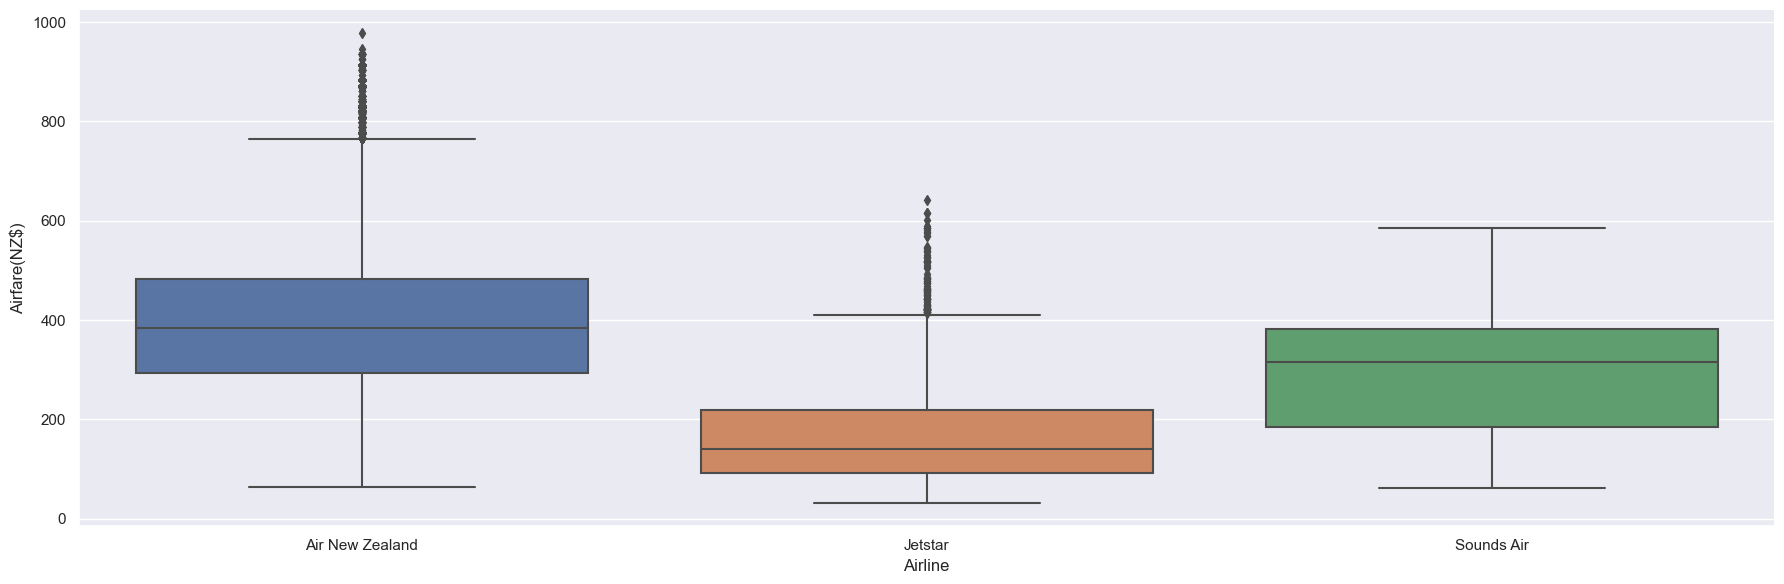

In [33]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Airfare(NZ$)", x = "Airline", data = train_data.sort_values("Airfare(NZ$)", ascending = False), kind="box", height = 6, aspect = 3)
plt.show()

In [34]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding - avoid Multicollinearity

Airline=train_data["Airline"].str.get_dummies().drop('Sounds Air',axis=1)
Airline = pd.get_dummies(Airline)

Airline.head()

,Air New Zealand,Jetstar
22054,1,0
692,1,0
89528,1,0
108221,1,0
95149,1,0


In [35]:
#train_data["Transit"].value_counts()

In [36]:
train_data.head()

,Travel_date,Departure,Destination,Direct,Airline,Airfare(NZ$),Travel_day,Travel_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
22054,30/09/2019,AKL,NSN,1,Air New Zealand,203,30,9,8,30,19,20,10,50
692,19/09/2019,CHC,AKL,1,Air New Zealand,517,19,9,14,5,18,20,4,15
89528,3/11/2019,CHC,PMR,1,Air New Zealand,362,3,11,18,0,8,35,14,35
108221,13/11/2019,AKL,ZQN,1,Air New Zealand,391,13,11,16,0,20,35,4,35
95149,6/11/2019,WLG,NPL,1,Air New Zealand,213,6,11,6,45,14,45,8,0


In [37]:
train_data.columns

Index(['Travel_date', 'Departure', 'Destination', 'Direct', 'Airline',
       'Airfare(NZ$)', 'Travel_day', 'Travel_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [38]:
train_data_v2 = pd.concat([train_data, Airline, Departure, Destination], axis = 1)

In [39]:
train_data_v2.shape

(114212, 27)

In [40]:
train_data_v2.columns

Index(['Travel_date', 'Departure', 'Destination', 'Direct', 'Airline',
       'Airfare(NZ$)', 'Travel_day', 'Travel_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air New Zealand', 'Jetstar', 'Dept_AKL', 'Dept_CHC', 'Dept_WLG',
       'Arr_AKL', 'Arr_CHC', 'Arr_DUD', 'Arr_NPE', 'Arr_NPL', 'Arr_NSN',
       'Arr_PMR', 'Arr_ZQN'],
      dtype='object')

In [41]:
train_data_v2.drop(["Airline", "Departure", "Destination"], axis = 1, inplace = True)

In [42]:
train_data_v2.head()

,Travel_date,Direct,Airfare(NZ$),Travel_day,Travel_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Dept_CHC,Dept_WLG,Arr_AKL,Arr_CHC,Arr_DUD,Arr_NPE,Arr_NPL,Arr_NSN,Arr_PMR,Arr_ZQN
22054,30/09/2019,1,203,30,9,8,30,19,20,10,...,0,0,0,0,0,0,0,1,0,0
692,19/09/2019,1,517,19,9,14,5,18,20,4,...,1,0,1,0,0,0,0,0,0,0
89528,3/11/2019,1,362,3,11,18,0,8,35,14,...,1,0,0,0,0,0,0,0,1,0
108221,13/11/2019,1,391,13,11,16,0,20,35,4,...,0,0,0,0,0,0,0,0,0,1
95149,6/11/2019,1,213,6,11,6,45,14,45,8,...,0,1,0,0,0,0,1,0,0,0


### Test Set

In [43]:
test_data.head()

,Travel_date,Departure,Dep. time,Destination,Arr. time,Duration,Direct,Transit,Airline,Airfare(NZ$)
147351,5/12/2019,WLG,10:45 AM,NSN,6:55 PM,8h 10m,(1 stop),5h 35m in AKL,Air New Zealand,292
97284,7/11/2019,WLG,7:45 AM,NPL,2:45 PM,7h 0m,(1 stop),5h 5m in AKL,Air New Zealand,213
23371,30/09/2019,ZQN,4:15 PM,AKL,7:50 AM,15h 35m,(1 stop),13h 10m in WLG,Air New Zealand,362
154086,11/12/2019,WLG,11:25 AM,NPE,12:25 PM,1h 0m,(Direct),0,Air New Zealand,133
3857,20/09/2019,ZQN,1:30 PM,NPE,6:55 PM,5h 25m,(1 stop),2h 30m in AKL,Air New Zealand,662


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28553 entries, 147351 to 22969
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Travel_date   28553 non-null  object
 1   Departure     28553 non-null  object
 2   Dep. time     28553 non-null  object
 3   Destination   28553 non-null  object
 4   Arr. time     28553 non-null  object
 5   Duration      28553 non-null  object
 6   Direct        28553 non-null  object
 7   Transit       28553 non-null  object
 8   Airline       28553 non-null  object
 9   Airfare(NZ$)  28553 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 2.4+ MB
None


Null values :
---------------------------------------------------------------------------
Travel_date     0
Departure       0
Dep. time       0
Destination     0
Arr. time       0
Duration        0
Direct          0
Transit         0


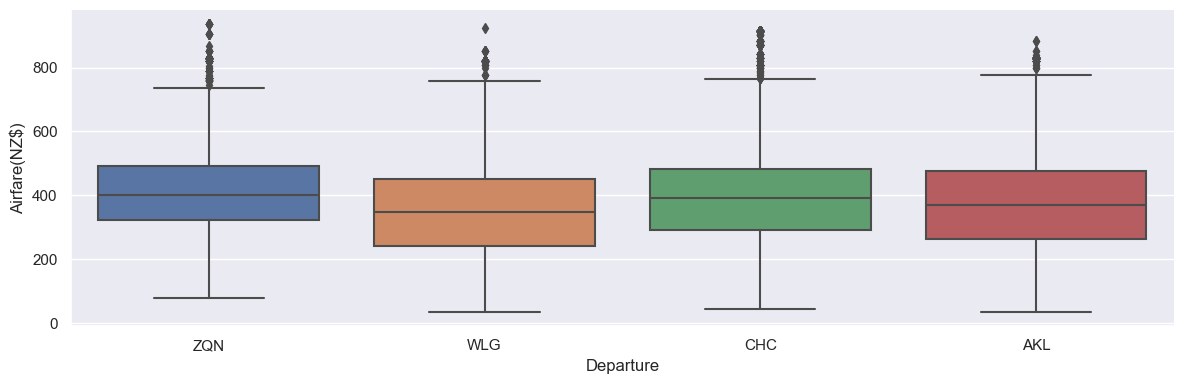

Destination


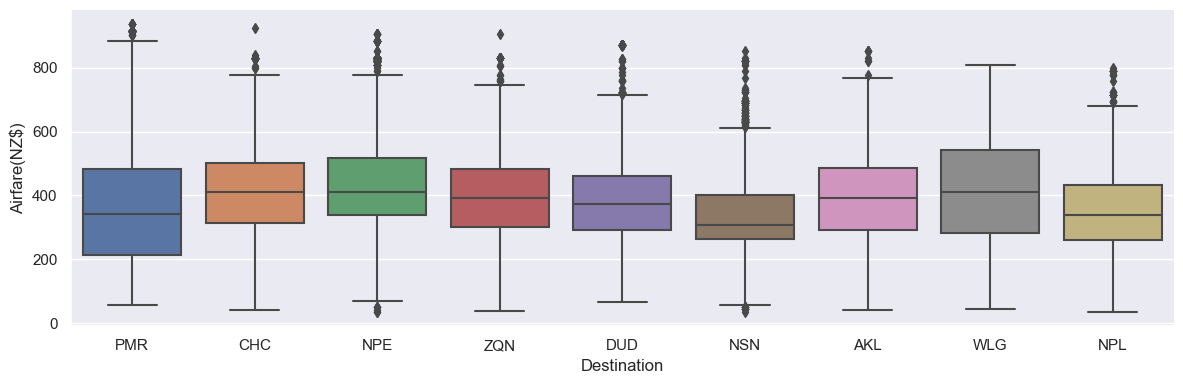

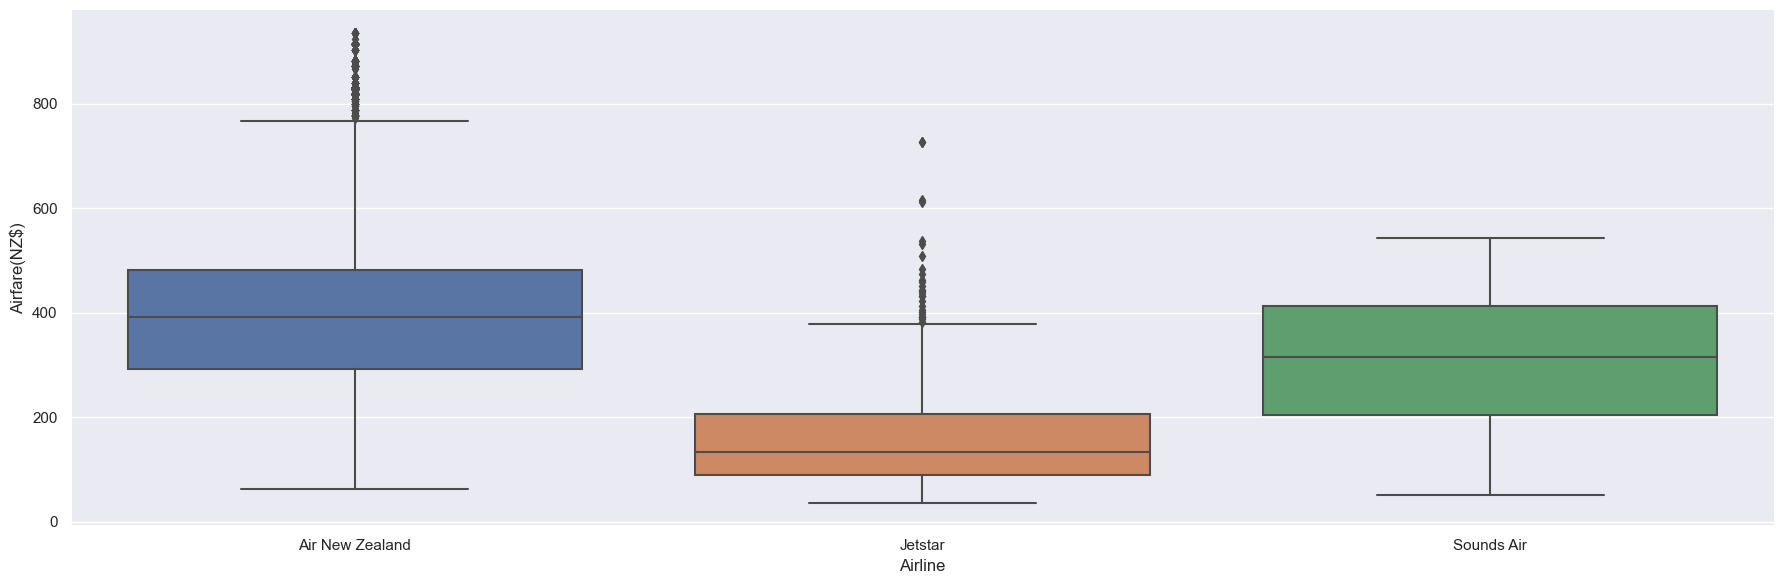

Airline
Shape of test data :  (28553, 24)


In [44]:
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

#Remove transit

#test_data=test_data.drop(columns=['Transit'])


# Travel Date

test_data["Travel_day"] = pd.to_datetime(test_data.Travel_date, format="%d/%m/%Y").dt.day
test_data["Travel_month"] = pd.to_datetime(test_data["Travel_date"], format = "%d/%m/%Y").dt.month
test_data.drop(["Travel_date"], axis = 1, inplace = True)

# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep. time"]).dt.hour

# Extracting Minutes
test_data["Dep_min"] = pd.to_datetime(test_data["Dep. time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
test_data.drop(["Dep. time"], axis = 1, inplace = True)

# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
test_data["Arrival_hour"] = pd.to_datetime(test_data["Arr. time"]).dt.hour

# Extracting Minutes
test_data["Arrival_min"] = pd.to_datetime(test_data["Arr. time"]).dt.minute

# Now we can drop Arrival_Time as it is of no use
test_data.drop(["Arr. time"], axis = 1, inplace = True)


# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


# Adding duration_hours and duration_mins list to test_data dataframe

test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins

test_data.drop(["Duration"], axis = 1, inplace = True)

test_data["Direct"].value_counts()

# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

test_data.replace({"(Direct)": 0, "(1 stop)": 1, "(2 stops)": 2, "(3 stops)": 3}, inplace = True)

test_data['Departure'].value_counts()

print("Departure")

# Departure vs Price

sns.catplot(y = "Airfare(NZ$)", x = "Departure", data = test_data.sort_values("Airfare(NZ$)", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

# As Departure is Nominal Categorical data we will perform OneHotEncoding

Departure = test_data["Departure"].str.get_dummies().drop('ZQN',axis=1).add_prefix('Dept_')

#Departure = pd.get_dummies(Departure)

Departure.head()
test_data['Destination'].value_counts()

# As Destination is Nominal Categorical data we will perform OneHotEncoding - drop WLG

Destination = test_data["Destination"].str.get_dummies().drop('WLG',axis=1).add_prefix('Arr_')

#Destination = pd.get_dummies(Destination)

print("Destination")

# Departure vs Price

sns.catplot(y = "Airfare(NZ$)", x = "Destination", data = test_data.sort_values("Airfare(NZ$)", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Airfare(NZ$)", x = "Airline", data = test_data.sort_values("Airfare(NZ$)", ascending = False), kind="box", height = 6, aspect = 3)
plt.show()

# As Airline is Nominal Categorical data we will perform OneHotEncoding - avoid Multicollinearity

Airline=test_data["Airline"].str.get_dummies().drop('Sounds Air',axis=1)
Airline = pd.get_dummies(Airline)

print("Airline")

#test_data["Transit"].value_counts()

test_data_v2 = pd.concat([test_data, Airline, Departure, Destination], axis = 1)

test_data_v2.drop(["Airline", "Departure", "Destination"], axis = 1, inplace = True)


print("Shape of test data : ", test_data_v2.shape)


In [45]:
test_data_v2.head()

,Direct,Transit,Airfare(NZ$),Travel_day,Travel_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Dept_CHC,Dept_WLG,Arr_AKL,Arr_CHC,Arr_DUD,Arr_NPE,Arr_NPL,Arr_NSN,Arr_PMR,Arr_ZQN
147351,1,5h 35m in AKL,292,5,12,10,45,18,55,8,...,0,1,0,0,0,0,0,1,0,0
97284,1,5h 5m in AKL,213,7,11,7,45,14,45,7,...,0,1,0,0,0,0,1,0,0,0
23371,1,13h 10m in WLG,362,30,9,16,15,7,50,15,...,0,0,1,0,0,0,0,0,0,0
154086,0,0,133,11,12,11,25,12,25,1,...,0,1,0,0,0,1,0,0,0,0
3857,1,2h 30m in AKL,662,20,9,13,30,18,55,5,...,0,0,0,0,0,1,0,0,0,0


## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [46]:
train_data_v2.shape

(114212, 24)

In [47]:
train_data_v2.columns

Index(['Travel_date', 'Direct', 'Airfare(NZ$)', 'Travel_day', 'Travel_month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air New Zealand', 'Jetstar', 'Dept_AKL', 'Dept_CHC',
       'Dept_WLG', 'Arr_AKL', 'Arr_CHC', 'Arr_DUD', 'Arr_NPE', 'Arr_NPL',
       'Arr_NSN', 'Arr_PMR', 'Arr_ZQN'],
      dtype='object')

In [48]:
X = train_data_v2.loc[:, ['Direct', 'Travel_day',
       'Travel_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Air New Zealand', 'Jetstar',
       'Dept_AKL', 'Dept_CHC', 'Dept_WLG', 'Arr_AKL', 'Arr_CHC', 'Arr_DUD',
       'Arr_NPE', 'Arr_NPL', 'Arr_NSN', 'Arr_PMR', 'Arr_ZQN']]
X.head()

,Direct,Travel_day,Travel_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air New Zealand,...,Dept_CHC,Dept_WLG,Arr_AKL,Arr_CHC,Arr_DUD,Arr_NPE,Arr_NPL,Arr_NSN,Arr_PMR,Arr_ZQN
22054,1,30,9,8,30,19,20,10,50,1,...,0,0,0,0,0,0,0,1,0,0
692,1,19,9,14,5,18,20,4,15,1,...,1,0,1,0,0,0,0,0,0,0
89528,1,3,11,18,0,8,35,14,35,1,...,1,0,0,0,0,0,0,0,1,0
108221,1,13,11,16,0,20,35,4,35,1,...,0,0,0,0,0,0,0,0,0,1
95149,1,6,11,6,45,14,45,8,0,1,...,0,1,0,0,0,0,1,0,0,0


In [49]:
y = train_data_v2.iloc[:, 2]
y.head()

22054     203
692       517
89528     362
108221    391
95149     213
Name: Airfare(NZ$), dtype: int64

C:\Users\alexchen\AppData\Local\Temp\ipykernel_10048\1724404863.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data_v2.corr(), annot = True, cmap = "RdYlGn")


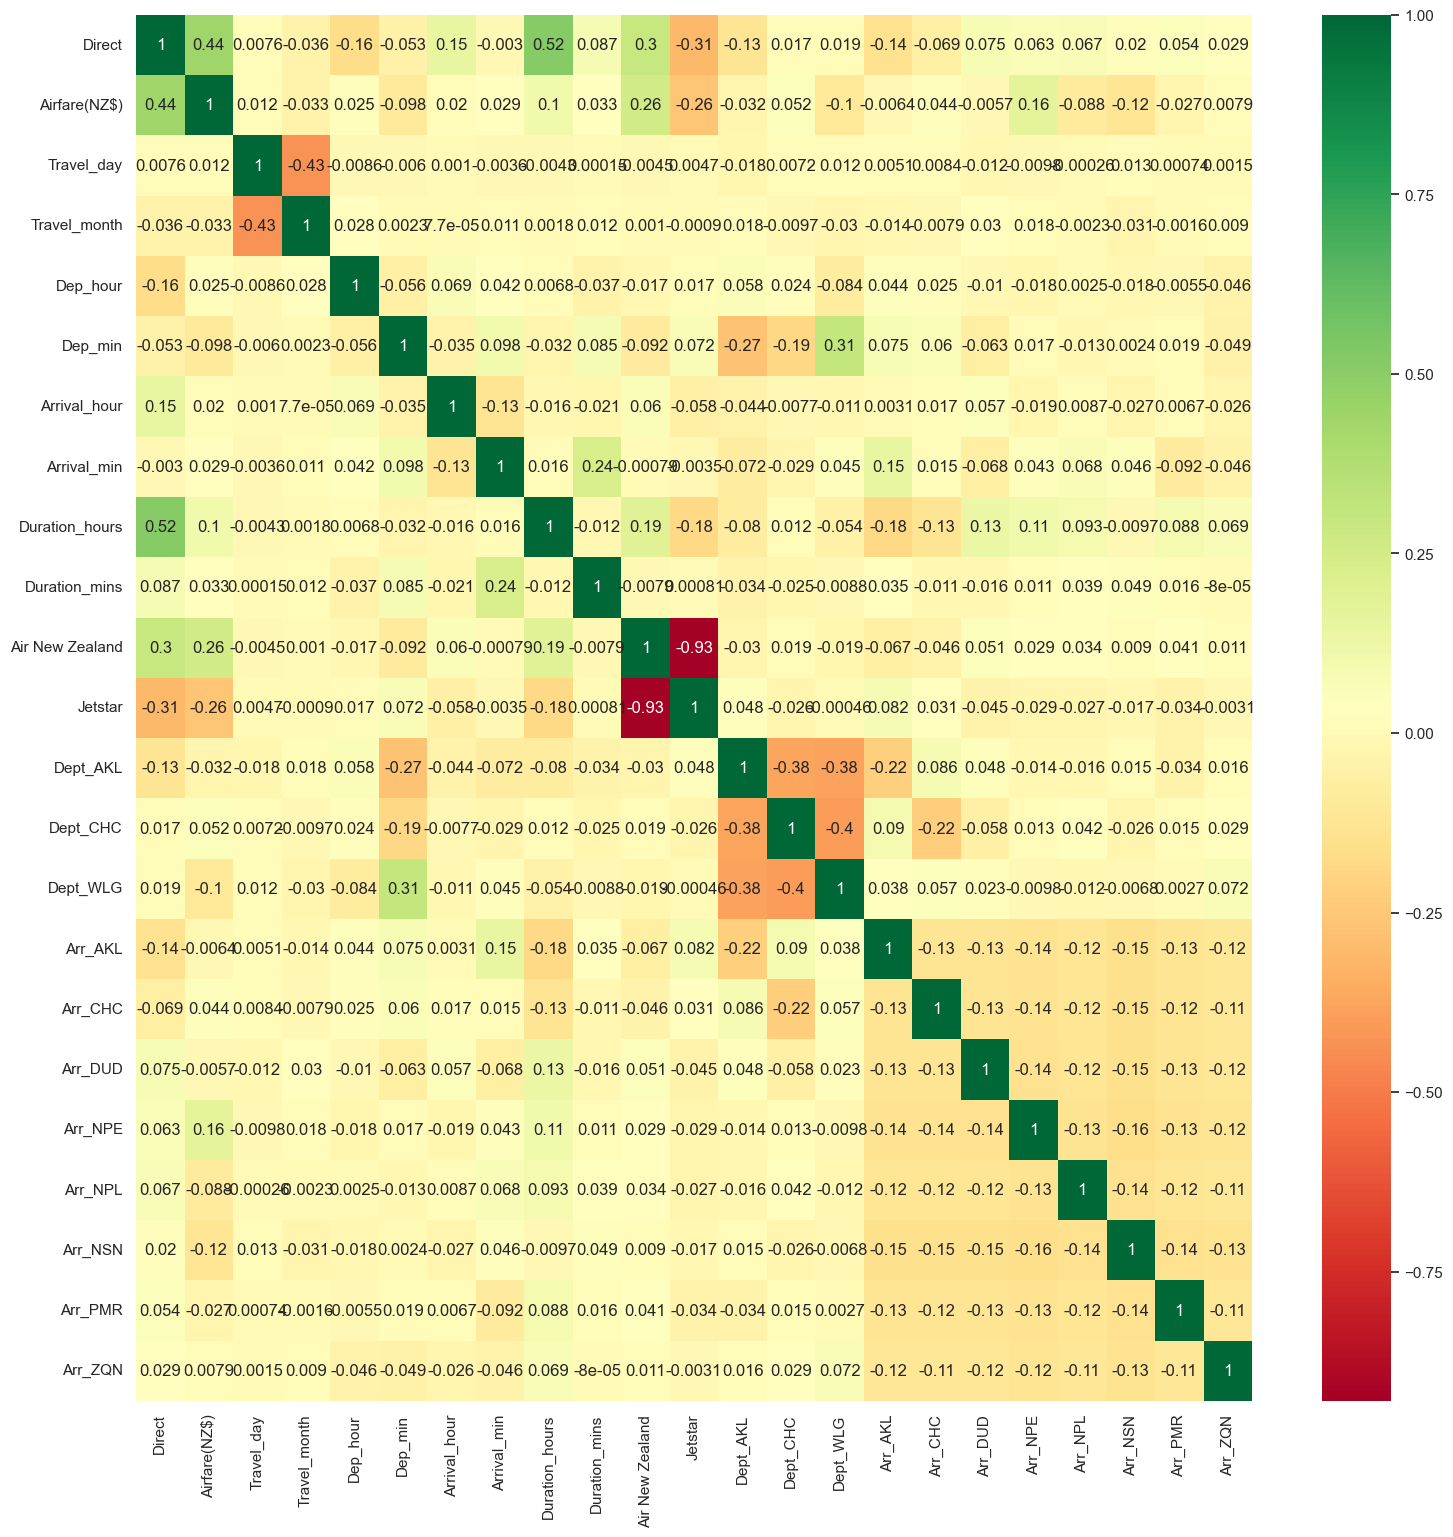

In [50]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data_v2.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [51]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [52]:
print(selection.feature_importances_)

[0.1916736  0.19055604 0.0435319  0.04397962 0.04566655 0.04511839
 0.04288847 0.09686653 0.02609954 0.01621316 0.00434375 0.02091896
 0.03304889 0.02523901 0.0175549  0.00562479 0.01802865 0.02433483
 0.02704892 0.02726788 0.04494822 0.00904742]


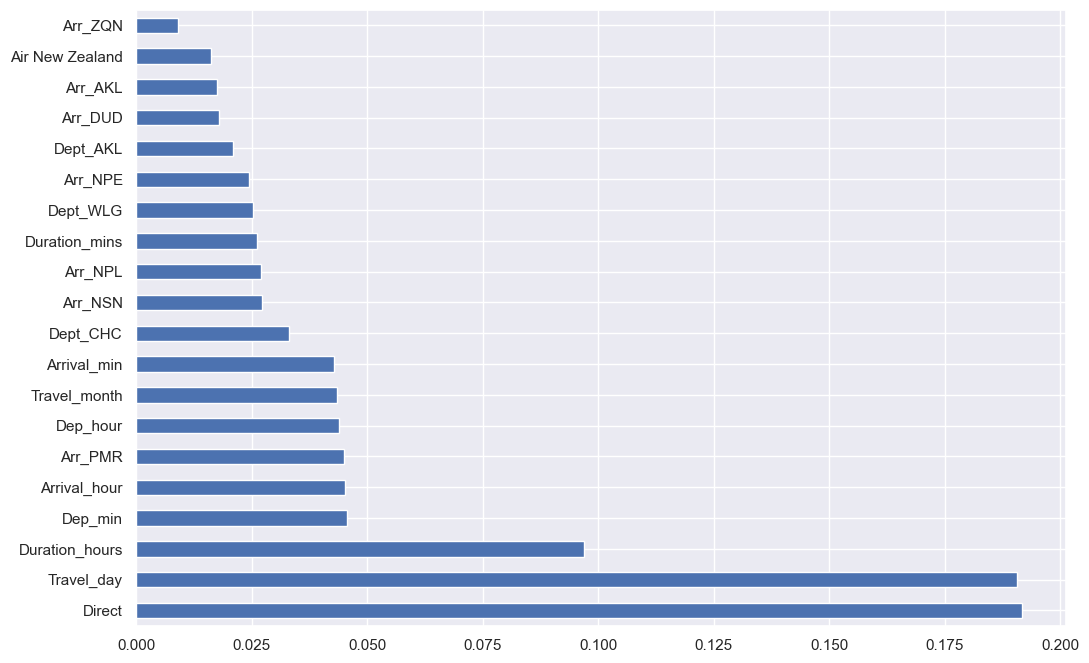

In [53]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
y_pred = reg_rf.predict(X_test)

In [57]:
reg_rf.score(X_train, y_train)

0.9677463222523701

In [58]:
reg_rf.score(X_test, y_test)

0.7909201174176692

C:\Users\alexchen\AppData\Local\Temp\ipykernel_10048\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


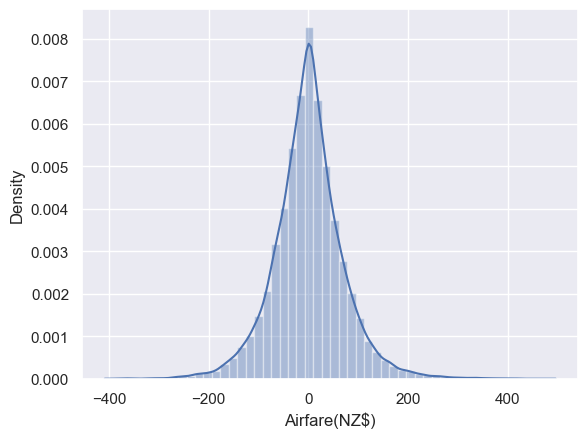

In [59]:
sns.distplot(y_test-y_pred)
plt.show()

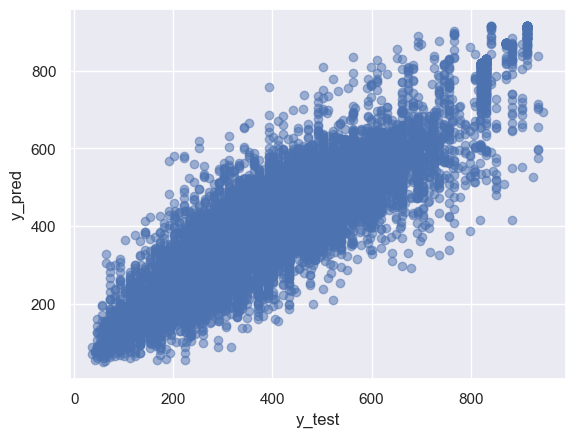

In [60]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [61]:
from sklearn import metrics

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 51.32166987785497
MSE: 4991.784566576811
RMSE: 70.65256234968984


In [63]:
# RMSE/(max(DV)-min(DV))

70.76667180907377/(max(y)-min(y))

0.07488536699372886

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [66]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [67]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [68]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  33.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  33.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  42.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  39.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  41.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  59.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  58.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  48.7s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  51.9s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  51.5s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  49.4s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  52.1s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 1.2min


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 1.2min


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 1.2min


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 1.2min


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 1.3min


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 2.4min


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 2.3min


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 2.4min


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 2.3min


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 2.4min
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.6min
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.4min
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.4min
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.4min
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.3min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  22.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  22.3s
[CV] END max_depth=5, max_feat

C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time= 2.5min


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time= 2.4min


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time= 2.4min


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time= 2.4min


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time= 2.5min


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [69]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [70]:
prediction = rf_random.predict(X_test)

C:\Users\alexchen\AppData\Local\Temp\ipykernel_10048\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


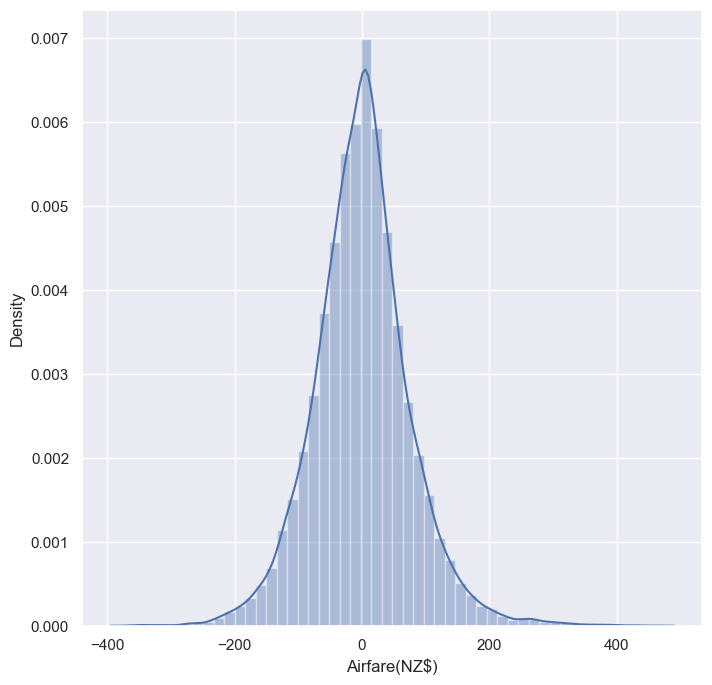

In [71]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

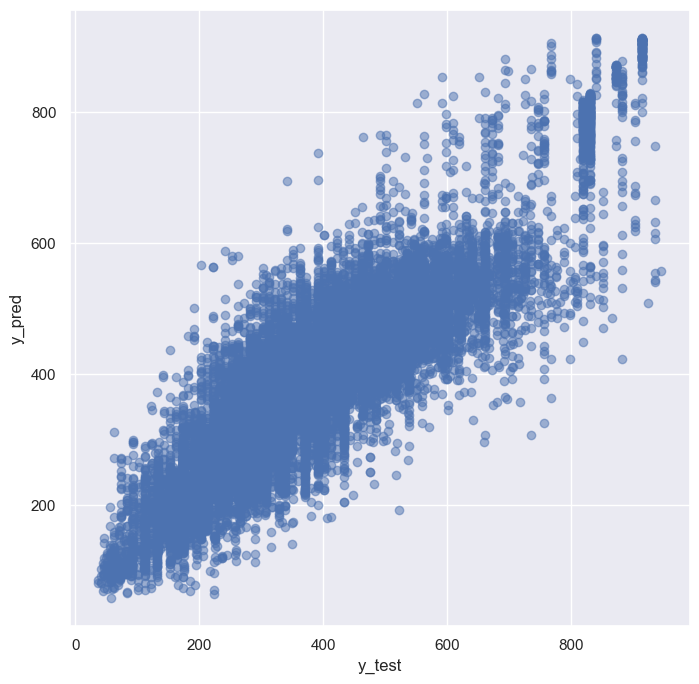

In [72]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 56.170941864143515
MSE: 5664.895305397479
RMSE: 75.26549877199699


## Save the model to reuse it again


In [76]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl','wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [77]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [78]:
y_prediction = forest.predict(X_test)

In [79]:
#R-square
metrics.r2_score(y_test, y_prediction)

0.7909201174176692